# DSFB Assignment 3 - Pre-Screening Funding Applications

By [Omid Shahmirzadi](https://ch.linkedin.com/in/omidshahmirzadi) - Email  [omid.shahmirzadi@epfl.ch](mailto:omid.shahmirzadi@epfl.ch)

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

The goal is to predict the chances that a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval and hence to save the time of volunteer reviewers so that they can focus on more solid projects.

Your machine learning algorithm can help more teachers get funded more quickly, and with less cost to DonorsChoose.org, allowing them to channel even more funding directly to classrooms across the country.

![](https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/580/cached.offlinehbpl.hbpl.co.uk/news/NST/C8B9CC1D-03B0-9B80-4CFE78B5B539240F.jpg)

Image source: https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/580/cached.offlinehbpl.hbpl.co.uk/news/NST/C8B9CC1D-03B0-9B80-4CFE78B5B539240F.jpg

Dataset source: https://www.kaggle.com/c/donorschoose-application-screening/data

As you will see, this dataset includes many different kinds of features with structured and unstructured data. You need to predict whether an application needs further study. To assess the quality of your predictions, consider the area under the curve (AUC). 

The features are listed as follows (see *application_data.csv*):

  * id - unique id of the project application  

  * teacher_id - id of the teacher submitting the application  

  * teacher_prefix - title of the teacher's name (Ms., Mr., etc.)  

  * school_state - US state of the teacher's school  

  * project_submitted_datetime - application submission timestamp  

  * project_grade_category - school grade levels (PreK-2, 3-5, 6-8, and 9-12)  

  * project_subject_categories - category of the project (e.g., "Music & The Arts")  

  * project_subject_subcategories - sub-category of the project (e.g., "Visual Arts")  

  * project_title - title of the project  

  * project_essay_1 - first essay*  

  * project_essay_2 - second essay*  

  * project_essay_3 - third essay*  

  * project_essay_4 - fourth essay*  

  * project_resource_summary - summary of the resources needed for the project  

  * teacher_number_of_previously_posted_projects - number of previously posted applications by the submitting teacher  

  * project_is_approved - whether DonorsChoose proposal was accepted (0="rejected", 1="accepted"); train.csv only  


Note: Prior to May 17, 2016, the prompts for the essays were as follows:

  * project_essay_1: "Introduce us to your classroom"  

  * project_essay_2: "Tell us more about your students"  

  * project_essay_3: "Describe how your students will use the materials you're requesting"  

  * project_essay_4: "Close by sharing why your project will make a difference"  

Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:

  * project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."  

  * project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"  


For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.

Proposals also include resources requested. Each project may include multiple requested resources (see *resource_data.csv*). Each row in *resource_data.csv* corresponds to a resource, so multiple rows may tie to the same project by id.

  * id - unique id of the project application; joins with test.csv. and train.csv on id  

  * description - description of the resource requested  

  * quantity - quantity of resource requested  

  * price - price of resource requested  

You can create a group of up to three to discuss the problem, however every body is encouraged to implement the solution on his own machine. Remember to name your group mates in your submission. 


## Part 1: Data Preperation, Data Cleaning and EDA

**Q 1:** Unlike other problems, this problem includes a big training set which is more than the standard size limit of github. Through the terminal lab of Jupyter lab, download it using wget command and unzip it using zip command and put it in the root directory of the problem. 

Locations : 

    Applications dataset: https://storage.googleapis.com/dsfm/application/application_data.csv.zip
    Resources dataset: https://storage.googleapis.com/dsfm/application/resource_data.csv.zip

Hint: Use *wget* and *unzip* commands. Use ! followed by a bash command in a cell to run a bash command.

In [ ]:
pwd

In [ ]:
import wget
wget.download('https://storage.googleapis.com/dsfm/application/application_data.csv.zip')
wget.download('https://storage.googleapis.com/dsfm/application/resource_data.csv.zip')

In [ ]:
import zipfile
zip_ref_data1 = zipfile.ZipFile('application_data.csv.zip')
zip_ref_data2 = zipfile.ZipFile('resource_data.csv.zip')
zip_ref_data1.extractall()
zip_ref_data2.extractall()
zip_ref_data1.close()
zip_ref_data1.close()

**Q 2:** Load the datasets and investigate their features. What could be a unifying strategy to create the same ‘project essay’ columns? Apply your strategy and deal with missing values afterwards.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#load data
application_data = pd.read_csv('application_data.csv')
resource_data = pd.read_csv('resource_data.csv')
#incestigate features
application_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [2]:
missing_token = "  "

#replace null value in columns 'project_essay_3', 'project_essay_4' with "  "
application_data.project_essay_3 = application_data.project_essay_3.fillna(missing_token)
application_data.project_essay_4 = application_data.project_essay_4.fillna(missing_token)

#extract length of each essay and title
application_data["essay1_len"] = application_data['project_essay_1'].apply(len)
application_data["essay2_len"] = application_data['project_essay_2'].apply(len)
application_data["essay3_len"] = application_data['project_essay_3'].apply(len)
application_data["essay4_len"] = application_data['project_essay_4'].apply(len)
application_data["title_len"] = application_data['project_title'].apply(len)

application_data[['essay1_len', 'essay2_len', 'essay3_len', 'essay4_len', 'title_len']].head()


,essay1_len,essay2_len,essay3_len,essay4_len,title_len
0,967,805,2,2,24
1,587,639,2,2,22
2,761,546,2,2,21
3,1201,1209,2,2,72
4,451,556,2,2,48


In [3]:
# combine the project essays to create a new project essay column
application_data['project_essay'] = application_data.apply(lambda row: ' '.join([str(row['project_essay_1']), 
                                            str(row['project_essay_2']), 
                                            str(row['project_essay_3']), 
                                            str(row['project_essay_4'])]), axis=1)
application_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay1_len,essay2_len,essay3_len,essay4_len,title_len,project_essay
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,,My students need 6 Ipod Nano's to create and d...,26,1,967,805,2,2,24,Most of my kindergarten students come from low...
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,,My students need matching shirts to wear for d...,1,0,587,639,2,2,22,Our elementary school is a culturally rich sch...
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,,My students need the 3doodler. We are an SEM s...,5,1,761,546,2,2,21,Hello;\r\nMy name is Mrs. Brotherton. I teach ...
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,,My students need balls and other activity equi...,16,0,1201,1209,2,2,72,My students are the greatest students but are ...
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,,My students need a water filtration system for...,42,1,451,556,2,2,48,My students are athletes and students who are ...


In [4]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

In [5]:
import string
punctuation = string.punctuation
# extract features from new project essay column
application_data['char_count'] = application_data['project_essay'].apply(len)
application_data['word_count'] = application_data['project_essay'].apply(lambda x: len(x.split()))
application_data['word_density'] = application_data['char_count'] / (application_data['word_count']+1)
application_data['punctuation_count'] = application_data['project_essay'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
application_data['title_word_count'] = application_data['project_essay'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
application_data['upper_case_word_count'] = application_data['project_essay'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
application_data['stopword_count'] = application_data['project_essay'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

#application_data[['char_count', 'word_count', 'word_density', 'punctuation_count', 'title_word_count', 'upper_case_word_count', 'stopword_count']].head()

In [6]:
#for every feature, calculate how many observations have missing values
print(application_data.isnull().sum(axis=0))

id                                              0
teacher_id                                      0
teacher_prefix                                  4
school_state                                    0
project_submitted_datetime                      0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_essay_1                                 0
project_essay_2                                 0
project_essay_3                                 0
project_essay_4                                 0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay1_len                                      0
essay2_len                                      0
essay3_len                                      0
essay4_len                                      0


In [7]:
#Since there are 4 missing value in column 'teacher_prefix', we'll try to fix it
#Count frequency of each value in column
print (application_data['teacher_prefix'].value_counts())


Mrs.       95405
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64


In [8]:
#since Mrs. is the most frenquent one in 'teacher_prefix', we'll replace null values with it
application_data.teacher_prefix = application_data.teacher_prefix.fillna('Mrs.')

In [9]:
#check whether the dataframe still has null value or not
print(application_data.isnull().sum(axis=0))

id                                              0
teacher_id                                      0
teacher_prefix                                  0
school_state                                    0
project_submitted_datetime                      0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_essay_1                                 0
project_essay_2                                 0
project_essay_3                                 0
project_essay_4                                 0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay1_len                                      0
essay2_len                                      0
essay3_len                                      0
essay4_len                                      0


**Q 3:** Merge resources dataset into application dataset. You can aggregate the total cost of requested resources for every project and merge it into applications dataset using the *id* field. 

Hint: Use *groupby* and *agg* functions of dataframe to create aggregates. Use *merge* function of *Pandas* to merge two dataframes.

In [10]:
resource_data.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [11]:
#in resource dataset, multiply quantity and price and form a new column 'total price'
resource_data['total_price'] = resource_data['quantity']*resource_data['price']

In [12]:
#create aggregates of total cost for every project
total_cost = resource_data.groupby('id').agg({'total_price': 'sum'})

#merge total cost into application data
data = pd.merge(application_data, total_cost, on="id", how='left')

In [13]:
data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,title_len,project_essay,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,stopword_count,total_price
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,...,24,Most of my kindergarten students come from low...,1779,312,5.683706,40,21,5,151,899.94
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,...,22,Our elementary school is a culturally rich sch...,1233,190,6.455497,38,15,3,79,400.00
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,...,21,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,1314,234,5.591489,26,26,4,103,469.99
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,...,72,My students are the greatest students but are ...,2417,386,6.245478,77,31,4,188,684.47
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,...,48,My students are athletes and students who are ...,1014,185,5.451613,15,13,0,98,711.00


**Q 4:**  Separate your merged dataset into features and target and visualize distribution of the target. Why area under the ROC curve is a suitable classification metric?

In [13]:
# Separates target and features
X = data.drop(columns=['project_is_approved', 'id'])
y = data.project_is_approved

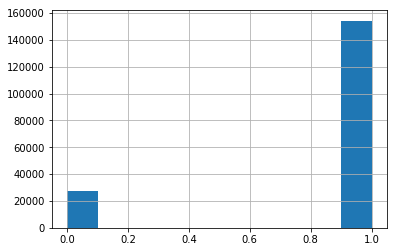

In [14]:
# Check distribution of target feature
data['project_is_approved'].hist()

In [ ]:
"""
Unbalanced dataset
use ROC curve to set threshold flexibly. 
"""

## Part 2: Encoding Categorical / DateTime Features

**Q 1:** What would be a possible issue with one hot encoding of teacher_id column? Can you think of another way to encode this feature?

In [16]:
data['teacher_id'].nunique()

104414

In [ ]:
"""
As we can see, there are 104414 unique teacher ids in the column. If we do one hot encoding of it, it 
will produce enormous columns, making the dataset complicated and difficult to handle. 
One way to encode this feature is that, for each teacher id, we generate the number of current request
by this teacher, and use it to replace teacher id.
"""

In [15]:
#count the frequency of current requests for each teacher id
counts = data['teacher_id'].value_counts()
counts = counts.rename_axis('teacher_id').reset_index(name='current_requests')


In [18]:
print(counts)

                              teacher_id  current_requests
0       fa2f220b537e8653fb48878ebb38044d                74
1       df8a4b7ad173b57f7ac52e447cc24043                71
2       1f64dcec848be8e95c4482cc845706b2                70
3       ae67d8bbc64ec3bf7fd2db1297721160                58
4       0d90f689080b0d740a62a51c7f362829                51
5       062339e2c5ca3b602351bb02ffef9ae4                49
6       9f49ba20aa1c28eb95dbad8b8edd2b69                48
7       7b17c95da53e3d1f011f84232ad01238                48
8       4aa921b73a2e523720789ff9b53e6504                48
9       d1fe66a662ad4807b33f87d2a12fac8b                47
10      613ac392781124be92aecc0d8b251c43                47
11      cd7400347f6c17ca9c1fdb5adbecbbac                46
12      19f24640d9da49f6f8b4c9938c049591                46
13      be87a3b5310f15bee9794a636a0929b7                46
14      b357af898fe06944813be328a2e1335a                45
15      1be8ff2501f21dbe85a2fc87afb641e8                

In [16]:
#merge teacher_number_of_previously_posted_projects with current requests

data_with_current_requests = pd.merge(counts, data, on="teacher_id", how='left')

In [20]:
data_with_current_requests.head()

,teacher_id,current_requests,id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,...,title_len,project_essay,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,stopword_count,total_price
0,fa2f220b537e8653fb48878ebb38044d,74,p003216,Mrs.,PA,2016-09-13 22:13:29,Grades PreK-2,Literacy & Language,Literature & Writing,Let's Celebrate Fall in a Fun and Sweet Way!,...,44,I have the largest amount of students in my cl...,1153,201,5.707921,33,19,5,93,232.92
1,fa2f220b537e8653fb48878ebb38044d,74,p085006,Mrs.,PA,2016-05-30 18:46:07,Grades PreK-2,Literacy & Language,Literacy,Reading and Math Center Time!,...,29,I have the largest amount of students in my cl...,1162,191,6.052083,38,26,6,81,270.99
2,fa2f220b537e8653fb48878ebb38044d,74,p116895,Mrs.,PA,2016-11-22 21:28:38,Grades PreK-2,"Math & Science, Music & The Arts","Mathematics, Visual Arts",Integrating Math and Art in First Grade!,...,40,I currently have 24 six- and seven-year-old st...,1116,182,6.098361,34,18,5,72,207.00
3,fa2f220b537e8653fb48878ebb38044d,74,p062746,Mrs.,PA,2017-03-30 12:15:20,Grades PreK-2,"Warmth, Care & Hunger","Warmth, Care & Hunger","Towels, Towels and More Towels!",...,31,I currently have 25 six- and seven-year-old st...,1202,202,5.921182,45,18,5,89,299.48
4,fa2f220b537e8653fb48878ebb38044d,74,p187789,Mrs.,PA,2016-09-12 20:47:59,Grades PreK-2,Literacy & Language,Literature & Writing,Let's Print Our Books!,...,22,I have the largest amount of students in my cl...,1139,196,5.781726,31,16,8,82,328.81


In [17]:
del data

**Q 2:** Encode categorical features of (teacher_prefix, school_state, project_grade_category) using one-hot-encoding.

In [18]:
# One hot encoding of categorical features
cols_to_transform = ['teacher_prefix', 'school_state', 'project_grade_category']
data_with_dummies = pd.get_dummies(data = data_with_current_requests, columns = cols_to_transform )
data_with_dummies.head()

,teacher_id,current_requests,id,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,...,school_state_VA,school_state_VT,school_state_WA,school_state_WI,school_state_WV,school_state_WY,project_grade_category_Grades 3-5,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2
0,fa2f220b537e8653fb48878ebb38044d,74,p003216,2016-09-13 22:13:29,Literacy & Language,Literature & Writing,Let's Celebrate Fall in a Fun and Sweet Way!,I have the largest amount of students in my cl...,My students will be having a Halloween/Fall Ha...,,...,0,0,0,0,0,0,0,0,0,1
1,fa2f220b537e8653fb48878ebb38044d,74,p085006,2016-05-30 18:46:07,Literacy & Language,Literacy,Reading and Math Center Time!,I have the largest amount of students in my cl...,My first graders need a new Chromebook for whe...,,...,0,0,0,0,0,0,0,0,0,1
2,fa2f220b537e8653fb48878ebb38044d,74,p116895,2016-11-22 21:28:38,"Math & Science, Music & The Arts","Mathematics, Visual Arts",Integrating Math and Art in First Grade!,I currently have 24 six- and seven-year-old st...,My first graders love combining art and Math. ...,,...,0,0,0,0,0,0,0,0,0,1
3,fa2f220b537e8653fb48878ebb38044d,74,p062746,2017-03-30 12:15:20,"Warmth, Care & Hunger","Warmth, Care & Hunger","Towels, Towels and More Towels!",I currently have 25 six- and seven-year-old st...,My students need Life Essential towels and soa...,,...,0,0,0,0,0,0,0,0,0,1
4,fa2f220b537e8653fb48878ebb38044d,74,p187789,2016-09-12 20:47:59,Literacy & Language,Literature & Writing,Let's Print Our Books!,I have the largest amount of students in my cl...,My first graders needs black ink as well as co...,,...,0,0,0,0,0,0,0,0,0,1


**Q 3:** What could be the issue with one-hot-encoding of project_subject_category and project_subject_subcategory ? Come up with a sensible solution and implement it.

Hint: Understand and use the following function to encode categories and subcategories:

    def getCatFeatures(df, Col):
        vectorizer = CountVectorizer(binary=True,
                                     ngram_range=(1,1),
                                     tokenizer=lambda x:[a.strip() for a in x.split(',')])
        return (vectorizer.fit_transform(df[Col]), vectorizer.vocabulary_)
        
To concat two sparse matrices, use *hstack* function from *scipy.sparse* package. To create a dataframe from an sparse matrix SM, use the following function:

    pd.SparseDataFrame([ pd.SparseSeries(SM[i].toarray().ravel()) for i in np.arange(SM.shape[0]) ])
    
Convert your sparse matrices to *csr* format before converting it to a dataframe using the following function:

    SM.tocsr()

In [ ]:
"""
Some projects belong to more than one categories, which we should separate them. But one-hot encoding
cannot do this
"""

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def getCatFeatures(df, Col):
    vectorizer = CountVectorizer(binary=True,
                                 ngram_range=(1,1),
                                 tokenizer=lambda x:[a.strip() for a in x.split(',')])
    return (vectorizer.fit_transform(df[Col]), vectorizer.vocabulary_)

sm_cat, cat_voc = getCatFeatures(data_with_dummies, 'project_subject_categories')
sm_subcat, subcat_voc = getCatFeatures(data_with_dummies, 'project_subject_subcategories')

In [20]:
from scipy.sparse import hstack, csr_matrix
SM= hstack([sm_cat,sm_subcat])
SM= SM.tocsr()
SM.shape

(182080, 39)

In [21]:
#Add new features to dataset
newfeatures=pd.SparseDataFrame([pd.SparseSeries(SM[i].toarray().ravel()) for i in np.arange(SM.shape[0]) ])

In [22]:
#New dataset
New_data=pd.concat([data_with_dummies,newfeatures],axis=1).to_dense()
New_data.shape

(182080, 127)

**Q 4:** What could be a sensible strategy to encode project_submitted_datetime feature? Why simply separate it into different numeric features for year/month/day/hour can be problematic?

Hint: Consider circular temporal features such as month, day of month, day of week, hour and dicuss about their appropriate encoding.

In [ ]:
"""
We create new features based on the given datetime, including 
'Year': Value of year when the proposal was submitted;
'Month': Month number (values between 1 to 12) when the proposal was submitted;
'Weekday': Week Day value (values between 1 to 7) when the proposal was submitted;
'Hour': Value of time hour (values between 0 to 23) when the proposal was submitted;
'Month_Day': Month Day (values between 1 to 31) when the proposal was submitted;
'Year_Day':  Year Day (values between 1 to 365) when the proposal was submitted

"""

In [23]:
import datetime as dt
# extracting datetime features using datetime module
New_data["project_submitted_datetime"] = pd.to_datetime(New_data["project_submitted_datetime"])
New_data["Year"] = New_data["project_submitted_datetime"].dt.year
New_data["Month"] = New_data["project_submitted_datetime"].dt.month
New_data['Weekday'] = New_data['project_submitted_datetime'].dt.weekday
New_data["Hour"] = New_data["project_submitted_datetime"].dt.hour
New_data["Month_Day"] = New_data['project_submitted_datetime'].dt.day
New_data["Year_Day"] = New_data['project_submitted_datetime'].dt.dayofyear

In [28]:
New_data[["Year", "Month", 'Weekday', "Hour", "Month_Day", "Year_Day"]].head()

,Year,Month,Weekday,Hour,Month_Day,Year_Day
0,2016,9,1,22,13,257
1,2016,5,0,18,30,151
2,2016,11,1,21,22,327
3,2017,3,3,12,30,89
4,2016,9,0,20,12,256


## Part 3: Encoding Textual Features

**Q 1:** Concat all textual fields into a single field and preprocess them using the steps we used in sentiment analysis demo (lower case, stop word removal, remove terms with digits, stemming). 

In [24]:
#drop duplicated columns
data_new = New_data.drop(columns=['teacher_id', 'project_submitted_datetime', 'project_subject_categories', 'project_subject_subcategories', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4'])
data_new.shape

(182080, 125)

In [25]:
# Concat all textual fields into a single field
data_new['all_text'] = data_new.apply(lambda row: ' '.join([str(row['project_title']), 
                                            str(row['project_essay']), 
                                            str(row['project_resource_summary'])]), axis=1)

In [26]:
data = data_new.drop(columns=['project_title', 'project_essay','project_resource_summary'])
data.shape

(182080, 123)

In [27]:
# Remove HTML tags

warnings.simplefilter('ignore')
from bs4 import BeautifulSoup             
   
data_no_html = BeautifulSoup(data['all_text'][0])  

print (data['all_text'][0])
print (data_no_html.get_text())

Let's Celebrate Fall in a Fun and Sweet Way! I have the largest amount of students in my classroom than any other room at my school. I am currently teaching thirty-one first-graders in a Title I school, located in a high poverty and high crime area of Pennsylvania. \r\n\r\nAll of my students receive free breakfast and lunch. Many of my students come from homes where English is not spoken. I have three special education students and four ESL (English as a Second Language) students in my classroom. Six of the students in my classroom have an in-class social worker. My students will be having a Halloween/Fall Harvest party at the end of October.  For our party, we would love to make goody bags.  In our bags we will put stickers, balls, pencils and lots of chocolate and candy.  We have been working very hard this year and are looking forward to our big celebration next month.  \r\nPlease help us to make our holiday party very special by donating to this fun and exciting project.  \r\nMy st

In [28]:
# Keep only alphabetical terms

import re

data_no_digits = re.sub('[^a-zA-Z]', ' ', data_no_html.get_text())  
print (data_no_digits)

Let s Celebrate Fall in a Fun and Sweet Way  I have the largest amount of students in my classroom than any other room at my school  I am currently teaching thirty one first graders in a Title I school  located in a high poverty and high crime area of Pennsylvania   r n r nAll of my students receive free breakfast and lunch  Many of my students come from homes where English is not spoken  I have three special education students and four ESL  English as a Second Language  students in my classroom  Six of the students in my classroom have an in class social worker  My students will be having a Halloween Fall Harvest party at the end of October   For our party  we would love to make goody bags   In our bags we will put stickers  balls  pencils and lots of chocolate and candy   We have been working very hard this year and are looking forward to our big celebration next month    r nPlease help us to make our holiday party very special by donating to this fun and exciting project    r nMy st

In [29]:
# Lower case and separate into tokens

lower_case = data_no_digits.lower()        
words = lower_case.split()
print(words)

['let', 's', 'celebrate', 'fall', 'in', 'a', 'fun', 'and', 'sweet', 'way', 'i', 'have', 'the', 'largest', 'amount', 'of', 'students', 'in', 'my', 'classroom', 'than', 'any', 'other', 'room', 'at', 'my', 'school', 'i', 'am', 'currently', 'teaching', 'thirty', 'one', 'first', 'graders', 'in', 'a', 'title', 'i', 'school', 'located', 'in', 'a', 'high', 'poverty', 'and', 'high', 'crime', 'area', 'of', 'pennsylvania', 'r', 'n', 'r', 'nall', 'of', 'my', 'students', 'receive', 'free', 'breakfast', 'and', 'lunch', 'many', 'of', 'my', 'students', 'come', 'from', 'homes', 'where', 'english', 'is', 'not', 'spoken', 'i', 'have', 'three', 'special', 'education', 'students', 'and', 'four', 'esl', 'english', 'as', 'a', 'second', 'language', 'students', 'in', 'my', 'classroom', 'six', 'of', 'the', 'students', 'in', 'my', 'classroom', 'have', 'an', 'in', 'class', 'social', 'worker', 'my', 'students', 'will', 'be', 'having', 'a', 'halloween', 'fall', 'harvest', 'party', 'at', 'the', 'end', 'of', 'october

In [30]:
# Remove stop words

from nltk.corpus import stopwords 
print (stopwords.words('english')) 
words_no_stop = [w for w in words if not w in stopwords.words('english')]
print (words_no_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
# Stem words

from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

print(stemmer.stem('grows'))
print(stemmer.stem('leaves'))
print(stemmer.stem('fairly'))

words_stemmed = [stemmer.stem(w) for w in words]
print (words_stemmed)

grow
leav
fair
['let', 's', 'celebr', 'fall', 'in', 'a', 'fun', 'and', 'sweet', 'way', 'i', 'have', 'the', 'largest', 'amount', 'of', 'student', 'in', 'my', 'classroom', 'than', 'ani', 'other', 'room', 'at', 'my', 'school', 'i', 'am', 'current', 'teach', 'thirti', 'one', 'first', 'grader', 'in', 'a', 'titl', 'i', 'school', 'locat', 'in', 'a', 'high', 'poverti', 'and', 'high', 'crime', 'area', 'of', 'pennsylvania', 'r', 'n', 'r', 'nall', 'of', 'my', 'student', 'receiv', 'free', 'breakfast', 'and', 'lunch', 'mani', 'of', 'my', 'student', 'come', 'from', 'home', 'where', 'english', 'is', 'not', 'spoken', 'i', 'have', 'three', 'special', 'educ', 'student', 'and', 'four', 'esl', 'english', 'as', 'a', 'second', 'languag', 'student', 'in', 'my', 'classroom', 'six', 'of', 'the', 'student', 'in', 'my', 'classroom', 'have', 'an', 'in', 'class', 'social', 'worker', 'my', 'student', 'will', 'be', 'have', 'a', 'halloween', 'fall', 'harvest', 'parti', 'at', 'the', 'end', 'of', 'octob', 'for', 'our',

In [32]:
# Function to convert a raw review to a string of words: 
# the input is a single string (a raw movie review) and
# the output is a single string (a preprocessed movie review)

def review_to_words( raw_review ):

    # Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
     
    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    
    # Stem words
    stem_words = [stemmer.stem(w) for w in meaningful_words]
    
    # Join the words back into one string separated by space and return the result
    return( " ".join( stem_words ))

In [33]:
# An example of text preprocessing

warnings.simplefilter('ignore')
clean_review = review_to_words( data['all_text'][4] )
print (data['all_text'][4])
print (clean_review)

Let's Print Our Books! I have the largest amount of students in my classroom than any other room at my school. I am currently teaching thirty-one first-graders in a Title I school, located in a high poverty and high crime area of Pennsylvania. \r\n\r\nAll of my students receive free breakfast and lunch. Many of my students come from homes where English is not spoken. I have three special education students and four ESL (English as a Second Language) students in my classroom. Six of the students in my classroom have an in-class social worker. My first graders needs black ink as well as colored ink in order for them to print their stories and activity sheets from RAZ-KIDS. They also need bright card stock paper so that their story books do not fall apart.\r\nMy students will be reading their story books and completing their activity sheets both at home and in class.  \r\nPlease support my first graders in getting reading books and activity sheets that are at their own level.\r\nWe would 

In [34]:
# Cleaning and parsing all movie reviews

warnings.simplefilter('ignore')
num_text = data['all_text'].size
clean_text = []
for i in range( 0, num_text ):
    # If the index is evenly divisible by 1000, print a message to show progress
    if( (i+1)%10000 == 0 ):
        print('Review %d of %d\n' % (i+1, num_text) )                                                                    
    clean_text.append( review_to_words( data['all_text'][i] ))

Review 10000 of 182080

Review 20000 of 182080

Review 30000 of 182080

Review 40000 of 182080

Review 50000 of 182080

Review 60000 of 182080

Review 70000 of 182080

Review 80000 of 182080

Review 90000 of 182080

Review 100000 of 182080

Review 110000 of 182080

Review 120000 of 182080

Review 130000 of 182080

Review 140000 of 182080

Review 150000 of 182080

Review 160000 of 182080

Review 170000 of 182080

Review 180000 of 182080



**Q 2:** Convert your preprocessed text into tfidf vectors and considr only the top 500 features ordered by term frequency. 

Hint: Use the *TfidfVectorizer* class from *sklearn.feature_extraction.text* package and convert its sparse matrix output to a dataframe.

In [35]:
# Transforming pre-processed reviews to bag of words feature representation
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(max_features = 500)
tfidf_vectors = tf_vectorizer.fit_transform(clean_text)
# Get feature names (each term is a feature)
tfidf_vocab = tf_vectorizer.get_feature_names()

In [36]:
#convert its sparse matrix output to a dataframe.
tfidf_vectors_toarray = tfidf_vectors.toarray()
tfidf_vectors_dataframe = pd.DataFrame(data = tfidf_vectors_toarray)

**Q 3:** Project your 500 dimensional tfidf vectors into 50 dimensions using PCA. 

Hint: Use *PCA* class from *sklearn.decomposition* package.

In [37]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

#standardize the data
vectors_sca = StandardScaler().fit_transform(tfidf_vectors_dataframe)

In [46]:
"""
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(50)
tfidf_vectors = svd.fit_transform(vectors_sca)
"""

In [38]:
#PCA projection to 50 dims
pca = PCA(n_components=50)
tfidf_vectors_50 = pca.fit_transform(vectors_sca)

In [39]:
textual_features = pd.DataFrame(tfidf_vectors_50, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20', 'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25', 'pc 26', 'pc 27', 'pc 28', 'pc 29', 'pc 30', 'pc 31', 'pc 32', 'pc 33', 'pc 34', 'pc 35', 'pc 36', 'pc 37', 'pc 38', 'pc 39', 'pc 40', 'pc 41', 'pc 42', 'pc 43', 'pc 44', 'pc 45', 'pc 46', 'pc 47', 'pc 48', 'pc 49', 'pc 50'])
textual_features.shape

(182080, 50)

**Q 4:** You can think of generating some new features out of text which are beneficial for the target application in mind. In particular try to generate the following features:

* Number of words in application text
* Number of spelling errors in application text


Hint: To count number of spelling mistakes we can use *enchant* library. Use the following function to do so:

    import enchant

    eng_dic = enchant.Dict('en_US')
    def num_spelling_errors(str):
        i = 0
        for word in str.split():
            if eng_dic.check(word) == False:
                i = i + 1
        return i


In [44]:
# count number of words in full text(including project title, project essay and project resource summary)
data['word_count_full_text'] = data['all_text'].apply(lambda x: len(x.split()))


In [ ]:
#count number of spelling mistakes
import enchant

eng_dic = enchant.Dict('en_US')
def num_spelling_errors(str):
    i = 0
    for word in str.split():
        if eng_dic.check(word) == False:
            i = i + 1
    return i

In [ ]:
#check the spelling errors of 'all text' content at the first row
error0 = num_spelling_errors(data['all_text'][0])
print(error0)

In [ ]:
warnings.simplefilter('ignore')
num_full_text = data['all_text'].size
spelling_errors = []
for i in range( 0, num_full_text ):
    # If the index is evenly divisible by 1000, print a message to show progress
    if( (i+1)%10000 == 0 ):
        print('Review %d of %d\n' % (i+1, num_full_text) )                                                                    
    spelling_errors.append( num_spelling_errors( data['all_text'][i] ))

## Part 4: Prepare Features and Baseline

**Q 1:** Organize your features into three dataframes of textual_features (projected in 50 dimensions), non_textual_features and all_features. Check data type of all features.

In [40]:
#textual_features has already obtained in PCA question
non_textual_features = data.drop(columns=['id', 'all_text', 'project_is_approved'])
all_features = pd.concat([textual_features, non_textual_features], axis=1)

In [41]:
all_features.dtypes

pc 1         float64
pc 2         float64
pc 3         float64
pc 4         float64
pc 5         float64
pc 6         float64
pc 7         float64
pc 8         float64
pc 9         float64
pc 10        float64
pc 11        float64
pc 12        float64
pc 13        float64
pc 14        float64
pc 15        float64
pc 16        float64
pc 17        float64
pc 18        float64
pc 19        float64
pc 20        float64
pc 21        float64
pc 22        float64
pc 23        float64
pc 24        float64
pc 25        float64
pc 26        float64
pc 27        float64
pc 28        float64
pc 29        float64
pc 30        float64
              ...   
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
31           

**Q 2:** Come up with a proper baseline to compare with your models.

In [42]:
target = data['project_is_approved']

In [43]:
#split into train an test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size=0.20,  random_state=1, shuffle=True)

In [44]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import roc_auc_score

# Define baseline regressor
baseline_reg = DummyRegressor()

# Fit the dummy regressor
baseline_reg.fit(X_train,y_train)

# Predict log of house prices
y_pred = baseline_reg.predict(X_test)

# Compute AUC
roc_auc_score(y_test, y_pred)

0.5

## Part 5: Gradient Boosted Trees

**Q 1:** Fit a gradient boosted trees model from *XGBoost* library to your data and tune the value of n_estimators parameter. Use nested cross validation function given in sentiment analysis demo with 3 splits in inner and outer folds. Assess the performance of your model by tuning *n_estimators* feature using the following sets of features:

* Non-textual features
* Textual features
* All features

Hint: Use the following function for nested cross-validation (Try to understand it before using it):

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

    def nested_cv(X, y, est_pipe, p_grid, p_score, n_splits_inner = 3, n_splits_outer = 3, n_cores = 1, seed = 0):

        # cross-validation schema for inner and outer loops
        inner_cv = StratifiedKFold(n_splits = n_splits_inner, shuffle = True, random_state = seed)
        outer_cv = StratifiedKFold(n_splits = n_splits_outer, shuffle = True, random_state = seed)

        # grid search to tune hyper parameters
        est = GridSearchCV(estimator = est_pipe, param_grid = p_grid, cv = inner_cv, scoring = p_score, n_jobs = n_cores)

        # nested CV with parameter optimization
        nested_scores = cross_val_score(estimator = est, X = X, y = y, cv = outer_cv, scoring = p_score, n_jobs = n_cores)

        print('Average score: %0.4f (+/- %0.4f)' % (nested_scores.mean(), nested_scores.std() * 1.96))
        
Moreover use the *XGBClassifier* class from *xgboost* package, which has a similar interface to other sklearn classifiers. *XGboost* library includes high perfromance implementations of gradient boosted trees. 

In [45]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

def nested_cv(X, y, est_pipe, p_grid, p_score, n_splits_inner = 3, n_splits_outer = 3, n_cores = 1, seed = 0):

    # cross-validation schema for inner and outer loops
    inner_cv = StratifiedKFold(n_splits = n_splits_inner, shuffle = True, random_state = seed)
    outer_cv = StratifiedKFold(n_splits = n_splits_outer, shuffle = True, random_state = seed)

    # grid search to tune hyper parameters
    est = GridSearchCV(estimator = est_pipe, param_grid = p_grid, cv = inner_cv, scoring = p_score, n_jobs = n_cores)

    # nested CV with parameter optimization
    nested_scores = cross_val_score(estimator = est, X = X, y = y, cv = outer_cv, scoring = p_score, n_jobs = n_cores)

    print('Average score: %0.4f (+/- %0.4f)' % (nested_scores.mean(), nested_scores.std() * 1.96))


In [46]:
list(all_features.columns.values)

['pc 1',
 'pc 2',
 'pc 3',
 'pc 4',
 'pc 5',
 'pc 6',
 'pc 7',
 'pc 8',
 'pc 9',
 'pc 10',
 'pc 11',
 'pc 12',
 'pc 13',
 'pc 14',
 'pc 15',
 'pc 16',
 'pc 17',
 'pc 18',
 'pc 19',
 'pc 20',
 'pc 21',
 'pc 22',
 'pc 23',
 'pc 24',
 'pc 25',
 'pc 26',
 'pc 27',
 'pc 28',
 'pc 29',
 'pc 30',
 'pc 31',
 'pc 32',
 'pc 33',
 'pc 34',
 'pc 35',
 'pc 36',
 'pc 37',
 'pc 38',
 'pc 39',
 'pc 40',
 'pc 41',
 'pc 42',
 'pc 43',
 'pc 44',
 'pc 45',
 'pc 46',
 'pc 47',
 'pc 48',
 'pc 49',
 'pc 50',
 'current_requests',
 'teacher_number_of_previously_posted_projects',
 'essay1_len',
 'essay2_len',
 'essay3_len',
 'essay4_len',
 'title_len',
 'char_count',
 'word_count',
 'word_density',
 'punctuation_count',
 'title_word_count',
 'upper_case_word_count',
 'stopword_count',
 'total_price',
 'teacher_prefix_Dr.',
 'teacher_prefix_Mr.',
 'teacher_prefix_Mrs.',
 'teacher_prefix_Ms.',
 'teacher_prefix_Teacher',
 'school_state_AK',
 'school_state_AL',
 'school_state_AR',
 'school_state_AZ',
 'school_state

In [ ]:
warnings.filterwarnings('ignore')
seed = 0

# Define pipeline
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

estimators = []
estimators.append(('xgb_clf', XGBClassifier()))
xgb_pipe = Pipeline(estimators)
xgb_pipe.set_params(xgb_clf__random_state = seed)

# Fixed parameters
score = 'accuracy'

# Setup possible values of parameters to optimize over
p_grid = {"xgb_clf__n_estimators": [int(i) for i in np.linspace(10.0, 50.0, 5)]}

nested_cv(X = all_features, y = target, est_pipe = xgb_pipe, p_grid = p_grid, p_score = score, n_cores = -1)

**Q 2:** Print list of 10 most important features considering all features as pedictors. 

## Part 6: Feed Forward Neural Network

**Q 1:** Train a feed forward neural network on all features. Consider a three layer dense neural network with 32 and 16 and 1 outputs respectively. Change number of epochs to 1 and 5 and see how it affects your final results. Note that the required computation of this part can be time consuming.  

Hint: Use the following model creation function:

    # build neural network model
    def create_model():
        # create model
        model = Sequential()
        model.add(Dense(32, input_dim=all_features.shape[1], activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    model = create_model()

To integrate *keras* classifiers into *sklearn*, use *KerasClassifier* wrapper from *keras.wrappers.scikit_learn* package. You can intgrate a keras clasifier into your sklearn pipeline as follows:

    estimators.append(('nn_clf', KerasClassifier(build_fn=create_model)))

Set the following parameters for your neural network model:

    nn_pipe.set_params(nn_clf__epochs = 1)
    nn_pipe.set_params(nn_clf__batch_size = 20)
    nn_pipe.set_params(nn_clf__verbose = 2)

**Q 2:** Discuss possible strategies can make your neural network to have a better prediction.

## Bonus: Food for Thought

To read: https://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf

To watch: https://www.youtube.com/watch?v=uawLjkSI7Mo